# Lab 2: Matrix factorization #
**Viktor Meyer - DD2363 Methods in Scientific Computing**

# **Abstract**

This lab is an exercise in matrix factorization. The mandatory part includes sparse matrix vector product, QR factorization and direct solver (Ax=b). There is also an extra assignment least squares problem, QR eigenvalue algorithm or blocked matrix-matrix product.

# **Environment**

To have access to the neccessary modules you have to run this cell.

In [0]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes

# **Introduction**

The methods to be implemented were covered in the during lectures and definitions are available in the lecture notes: LN-DD2363-part3.pdf. 



# **Methods**

### Sparse Matrix-Vector Product ###

Sparse matrices are matrices that contain a lot of zeros and are not dense in information. This is a problem since they essentially waste space. CRS is a datastructure that can be employed to make more efficient use of computer memory. 

The smvp (SparseMatrixVectorProduct) method below takes a CRS structure as input and performs matrix vector product calculation:

In [0]:
# LN-DD2363-part3.pdf, pp. 7

def smvp(val, col_idx, row_ptr, x):
  b = np.matrix(np.ndarray(shape=(len(x), 1)))
  
  for i in range(len(x)):
    b[i] = 0
    for j in range(int(row_ptr[i]), int(row_ptr[i+1])):
      b[i, 0] += val[j] * x[int(col_idx[j])]; 
      
  return b

The crs method below takes a matrix A as input and converts it to CRS form:

In [0]:
def crs(A):
  val = np.array([])
  col_idx = np.array([])
  row_ptr = np.array([])

  for dy in range(A.shape[1]):
    addedRowPtr = False
    for dx in range(A.shape[0]):
      if(A[dy, dx] != 0):
        col_idx = np.append(col_idx, dx)
        if not (addedRowPtr):
          row_ptr = np.append(row_ptr, len(val))
          addedRowPtr = True
        val = np.append(val, A[dy, dx])

  row_ptr = np.append(row_ptr, len(val))

  return np.array([val, col_idx, row_ptr])  

We test the SVMP method with a simple matrix to ensure that the SVMP is equal to ordinary matrix vector product:

In [99]:
def smvp_test():
  A = np.matrix("2 2; 2 2")
  x = np.matrix("2; 2")
  crsform = crs(A)
  print("A = ", A)
  print("x = ", x)
  print("b = ", smvp(crsform[0], crsform[1], crsform[2], x))
  print("b(dense) = ", A*x)

smvp_test()

A =  [[2 2]
 [2 2]]
x =  [[2]
 [2]]
b =  [[8.]
 [8.]]
b(dense) =  [[8]
 [8]]


We also test the SVMP method and compare it to ordinary vector product to see how it behaves for large matrices:

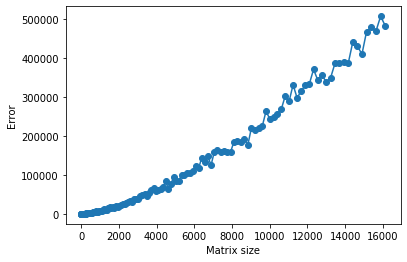

In [100]:
def smvp_plot():
  sizes = np.array([])
  errors = np.array([])

  for n in range(128):
    A = np.random.rand(n, n)
    x = np.random.rand(n, 1)

    crsform = crs(A)

    sparseresult = smvp(crsform[0], crsform[1], crsform[2], x)
    denseresult = A*x
  
    error = np.abs(np.sum(denseresult-sparseresult))
    
    sizes = np.append(sizes, n*n)
    errors = np.append(errors, error)

  plt.figure()
  plt.xlabel('Matrix size')
  plt.ylabel('Error')
  plt.plot(sizes, errors, 'o-')

smvp_plot()

It is apparent that there is a precision error when matrix sizes increase, this could be caused by e.g repeated floating point arithmetic error.

### QR Factorization ###

QR Factorization is of use when we are solving systems of equations. Triangular matrices are often important when solving equation systems, QR Factorization aims to take a matrix A and express it as triangular matrix R and matrix Q

In [0]:
# LN-DD2363-part1.pdf, pp. 22

def qrf(A):

  assert(np.linalg.det(A) != 0)

  Q = np.zeros(A.shape)
  R = np.zeros(A.shape)

  V = A[:,[0]]

  for i in range(A.shape[0]):
    R[i, i] = np.linalg.norm(V)
    Q[:, [i]] = V / R[i, i]
    for j in range(i+1, A.shape[0]):
      R[i, j] = np.sum(np.dot(Q[:,[i]].T, A[:,[j]]))
      V = A[:,[j]] - R[i, j]*Q[:,[i]]

  return [Q, R]

We formulate a quick test to make sure that QR Factorization is working properly, an important property is that R is triangular:

In [102]:
def is_triangular(A):
  for i in range(A.shape[0]):
    for j in range(0, i):
      if (A[i, j] != 0): return False
  return True

def qrf_test():
  A = np.matrix("2 -1; -1 2")
  Q, R = qrf(A)
  print("A = ", A)
  print("Q = ", Q)
  print("R = ", R)
  print("is_triangular(R) = ", is_triangular(R))

qrf_test()


A =  [[ 2 -1]
 [-1  2]]
Q =  [[ 0.89442719  0.4472136 ]
 [-0.4472136   0.89442719]]
R =  [[ 2.23606798 -1.78885438]
 [ 0.          1.34164079]]
is_triangular(R) =  True


### Direct Solver ###

From litterature we know that if Ax=b then x=A⁻1b, this is what is refered to as a direct solver technique:

In [0]:
def ds(A, b):

  A_inverse = np.linalg.inv(A)

  x = A_inverse*b

  return x

We formulate a quick test to make sure that the direct solver is working correctly, for example, if a solution is correct then Ax-b == 0

In [104]:
def ds_test():
  A = np.matrix("1 0; 2 2")
  b = np.matrix("1; 6")
  x = ds(A, b)
  print("A = ", A)
  print("b = ", b)
  print("x = ", x)

  print("||Ax-b|| = ", np.linalg.norm(A*x-b))

ds_test()

A =  [[1 0]
 [2 2]]
b =  [[1]
 [6]]
x =  [[1.]
 [2.]]
||Ax-b|| =  0.0


# **Results**

The results appear to be correctly implemented. This is not surprising since the various algorithms follow what is described in LN-DD2363-part3.pdf.

# **Discussion**

Sparse Matrix Vector Product was of particular interest. The problem of large datasets is of real world importance. The comparison between dense and sparse matrix products showed that there may be accuracy loss when matrices approach larger sizes.